# Fashion MNIST

## Introduction


 Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

This is what the dataset looks like:


<img src="fashion.png"/>

But it is difficult to perform machine learning alogorithm's on the images so we have to convert the images in the form of csv file. For that we have to compress the images to represent each images in the form of pixel.There are 28X28 pixels in one image.
Each pixel has a specific value. So our final dataset will be the pixel representation of the image.

## Dataset Characteristics

Number Of Instances: 10000
<br>Number Of Attributes: 784
<br>Attribute Information: 28x28 image of a clothing item divided into 10 category
<br>Missing Attribute Value: None
<br>Creator: Zalando's article


## Dataset Description
<br>
> - Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
> - Each pixel has a single pixel value associated with it, indicating the lightness or darkness of that pixel(higher numbers meaning darker).
> - The pixel value is an integer between 0 and 255.
> - The training and testing datasets have 785 columns.
> - The first column in the dataset consist of class labels which represents the article of clothing.
> - The rest of the columns contain the pixel values of the associated image.
>      -  To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
>      -  For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.

<b> The Dataset has 10 categories in which it is divided called 10 labels ranging from 0...9 <b>

# Label Description
<br>
 <img src="label.PNG" />

## Objective Of The Project
1. View the data as an image<br>
2. Train different classifiers<br>
3. Compare performance for different classifiers using various metrics


## Dataset

The dataset is in the form of a csv file:
https://drive.google.com/file/d/1eeJu_0kXJnCFcn_sikhvQ7h2iKbZwpt9/view?usp=sharing/

### Loading The Dataset

In [34]:
# let us first import all the necessary libraries for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
# now lets import the dataset using the read_csv command in pandas library
df=pd.read_csv('fashion-data.csv')

In [35]:
#now lets describe the data
df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [36]:
# this shows how our dataset looks and displays first 5 rows
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
#no of data points and features
print(df.shape)

(10000, 785)


In [38]:
# Name of all columns in the dataset
print(df.columns)

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)


### Total number of Items in Each Label Clas

In [39]:
df['label'].value_counts()

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64

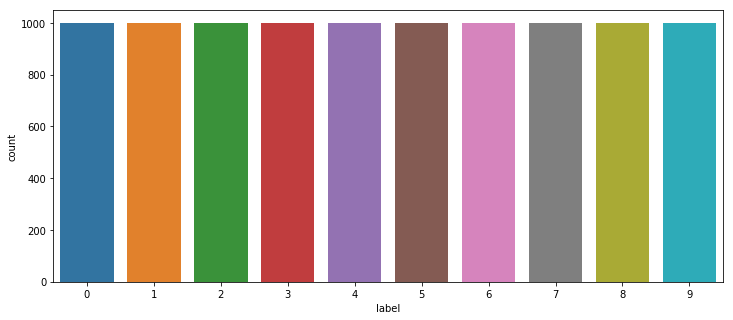

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='label',data=df)
#sns.distplot(df['label'],kde=False) #another example of univariant plot

In [41]:
# lets check for any duplicacy in the data-set provided
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

 so the dataset doesnt have any duplicacy

## Checking For Missing Values

In [42]:
df.isnull().values.any()

False

This indicates that therer are no NULL values present in our dataset

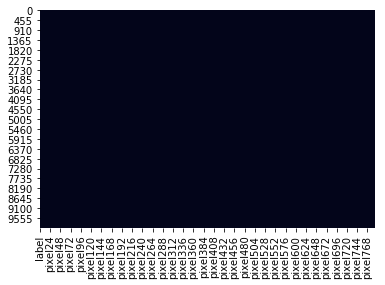

In [43]:
sns.heatmap(df.isnull(),cbar=False)

#### we can see that there are no missing values in the data

#### so there is no need to cleanse the data

### Splitting the Columns into dependent and independent Variables i.e. X and Y

In [46]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

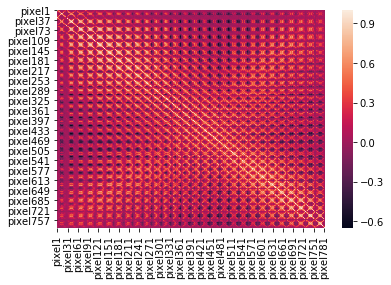

In [47]:
sns.heatmap(X.corr())

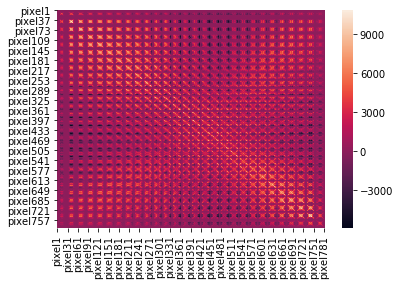

In [48]:
sns.heatmap(X.cov())

## Reshaping the Data

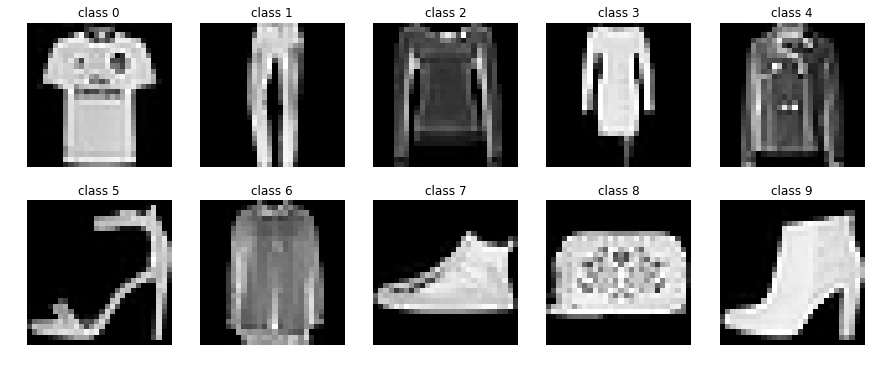

In [49]:
plt.figure(figsize=(15,6))
for a in range(10):
    plt.subplot(2,5,a+1)
    img=df[df.label==a].iloc[0,1:].values
    img=img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title("class "+str(a))
    plt.axis('off')
plt.show()

These images show the Images of every particular class present in the dataset

## Spliting the Data into Test and Train Set

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

#  Classification Techniques

### Training model using Training set(x_train, y_train)

### Testing the model on Test Set(X_test)

#### Printing the following for each classification Algorithm:

### 1. Accuracy Score
### 2. Confusion Matrix
### 3. Classification Report

## Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
y_pred=regressor.predict(X_test)

### Accuracy Score

In [53]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
score_1=accuracy_score(y_test,y_pred)
print(score_1)

0.7465


### Confusion Matrix

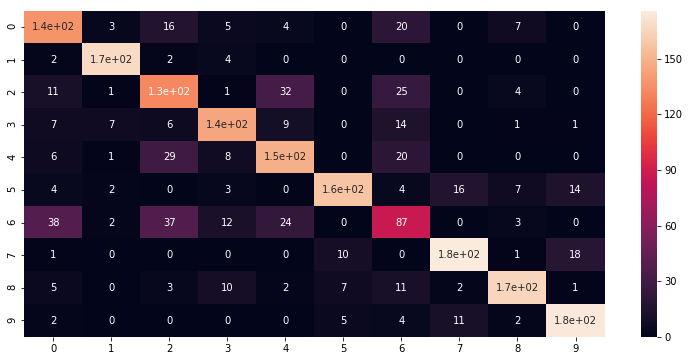

In [105]:
p=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [55]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.64      0.71      0.68       192
          1       0.91      0.95      0.93       176
          2       0.59      0.64      0.61       206
          3       0.77      0.76      0.77       190
          4       0.68      0.70      0.69       213
          5       0.88      0.76      0.81       208
          6       0.47      0.43      0.45       203
          7       0.86      0.85      0.86       206
          8       0.87      0.80      0.83       207
          9       0.84      0.88      0.86       199

avg / total       0.75      0.75      0.75      2000



## KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
y_pred_knn=knn.predict(X_test)

In [58]:
score_2=accuracy_score(y_test,y_pred_knn)
print(score_2)

0.8105


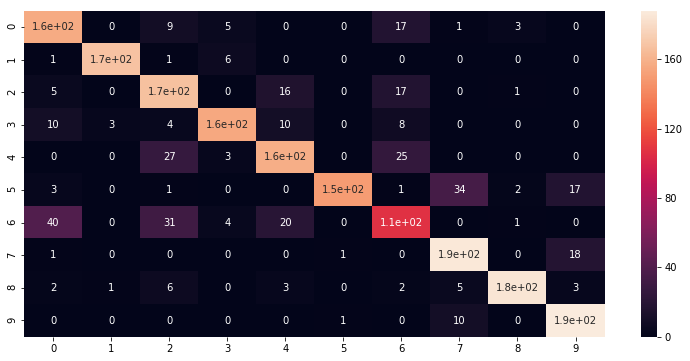

In [106]:
p=confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [59]:
print(classification_report(y_test,y_pred_knn))

             precision    recall  f1-score   support

          0       0.72      0.82      0.76       192
          1       0.98      0.95      0.97       176
          2       0.68      0.81      0.74       206
          3       0.90      0.82      0.85       190
          4       0.76      0.74      0.75       213
          5       0.99      0.72      0.83       208
          6       0.60      0.53      0.56       203
          7       0.79      0.90      0.84       206
          8       0.96      0.89      0.93       207
          9       0.83      0.94      0.88       199

avg / total       0.82      0.81      0.81      2000



## Multinomial Naive Bayes

In [60]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [61]:
y_pred_nvm = model.predict(X_test)

In [62]:
score_3=accuracy_score(y_test,y_pred_nvm)
print(score_3)

0.665


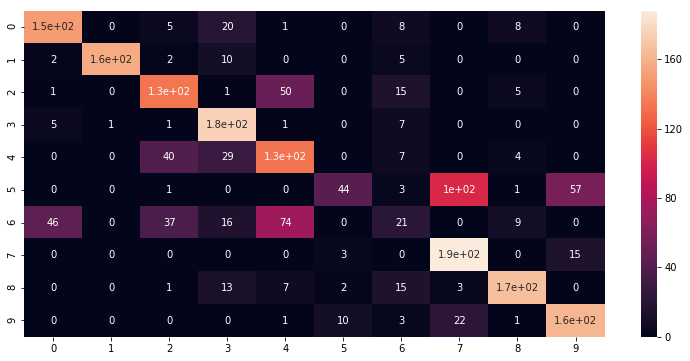

In [104]:
p=confusion_matrix(y_test,y_pred_nvm)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

In [64]:
print(classification_report(y_test,y_pred_nvm))

             precision    recall  f1-score   support

          0       0.74      0.78      0.76       192
          1       0.99      0.89      0.94       176
          2       0.61      0.65      0.63       206
          3       0.66      0.92      0.77       190
          4       0.50      0.62      0.55       213
          5       0.75      0.21      0.33       208
          6       0.25      0.10      0.15       203
          7       0.60      0.91      0.72       206
          8       0.86      0.80      0.83       207
          9       0.69      0.81      0.75       199

avg / total       0.66      0.67      0.64      2000



## Support Vector Machine 


In [65]:
from sklearn.svm import SVC
model=SVC(kernel='linear')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
y_pred_svm=model.predict(X_test)

In [67]:
score_4=accuracy_score(y_test,y_pred_svm)
print(score_4)

0.7935


### Confusion Matrix

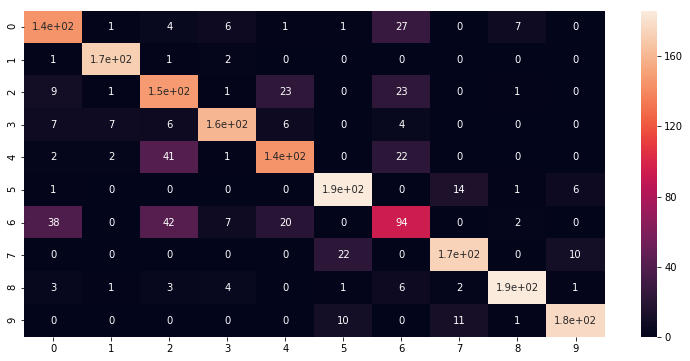

In [107]:
p=confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [69]:
print(classification_report(y_test,y_pred_svm))

             precision    recall  f1-score   support

          0       0.70      0.76      0.73       192
          1       0.93      0.98      0.96       176
          2       0.60      0.72      0.66       206
          3       0.88      0.84      0.86       190
          4       0.74      0.68      0.71       213
          5       0.85      0.89      0.87       208
          6       0.53      0.46      0.50       203
          7       0.87      0.84      0.86       206
          8       0.94      0.90      0.92       207
          9       0.91      0.89      0.90       199

avg / total       0.79      0.79      0.79      2000



## Radial Basis Function

In [70]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [71]:
y_pred_svc1=model.predict(X_test)

In [72]:
score_5=accuracy_score(y_test,y_pred_svc1)
print(score_5)

0.088


### Confusion Matrix

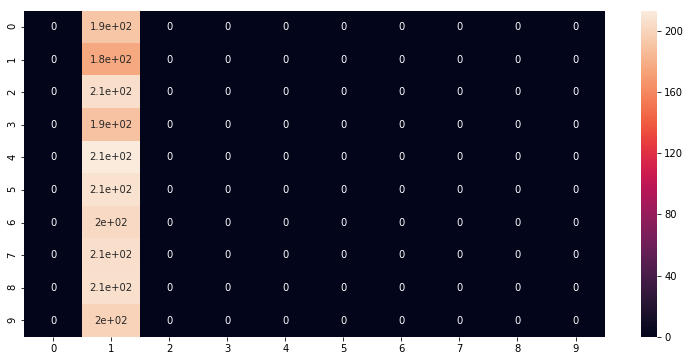

In [109]:
p=confusion_matrix(y_test,y_pred_svc1)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [74]:
print(classification_report(y_test,y_pred_svc1))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       192
          1       0.09      1.00      0.16       176
          2       0.00      0.00      0.00       206
          3       0.00      0.00      0.00       190
          4       0.00      0.00      0.00       213
          5       0.00      0.00      0.00       208
          6       0.00      0.00      0.00       203
          7       0.00      0.00      0.00       206
          8       0.00      0.00      0.00       207
          9       0.00      0.00      0.00       199

avg / total       0.01      0.09      0.01      2000



C:\Users\sarth\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
y_pred_dtc=dtc.predict(X_test)

In [77]:
score_6=accuracy_score(y_test,y_pred_dtc)
print(score_6)

0.736


### Confusion Matrix

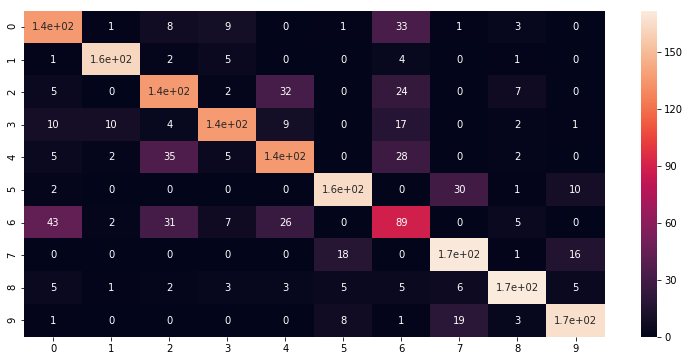

In [110]:
p=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [79]:
print(classification_report(y_test,y_pred_dtc))

             precision    recall  f1-score   support

          0       0.65      0.71      0.68       192
          1       0.91      0.93      0.92       176
          2       0.62      0.66      0.64       206
          3       0.82      0.72      0.77       190
          4       0.66      0.64      0.65       213
          5       0.84      0.79      0.81       208
          6       0.44      0.44      0.44       203
          7       0.75      0.83      0.79       206
          8       0.87      0.83      0.85       207
          9       0.84      0.84      0.84       199

avg / total       0.74      0.74      0.74      2000



## Decision Tree (Entropy)

In [80]:
from sklearn.tree import DecisionTreeClassifier
dtc_2=DecisionTreeClassifier(criterion='entropy')
dtc_2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
y_pred_dtc2=dtc_2.predict(X_test)

In [82]:
score_7=accuracy_score(y_test,y_pred_dtc2)
print(score_7)

0.747


### Confusion Matrix

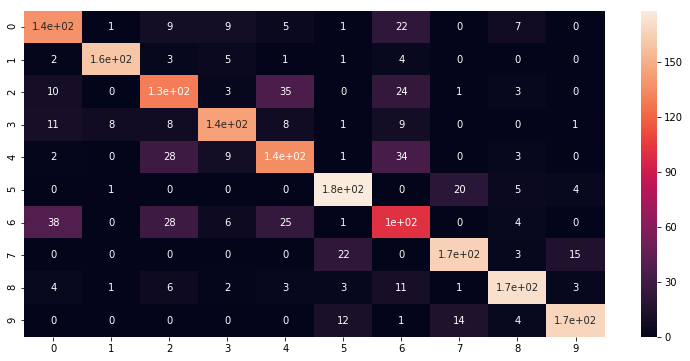

In [111]:
p=confusion_matrix(y_test,y_pred_dtc2)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [84]:
print(classification_report(y_test,y_pred_dtc2))

             precision    recall  f1-score   support

          0       0.67      0.72      0.70       192
          1       0.94      0.91      0.92       176
          2       0.61      0.63      0.62       206
          3       0.81      0.76      0.78       190
          4       0.64      0.64      0.64       213
          5       0.81      0.86      0.83       208
          6       0.49      0.50      0.49       203
          7       0.82      0.81      0.81       206
          8       0.86      0.84      0.85       207
          9       0.88      0.84      0.86       199

avg / total       0.75      0.75      0.75      2000



## Random Forest(Ginni)

In [85]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
y_pred_rfc=rfc.predict(X_test)

In [87]:
score_8=accuracy_score(y_test,y_pred_rfc)
print(score_8)

0.8235


### Confusion Matrix

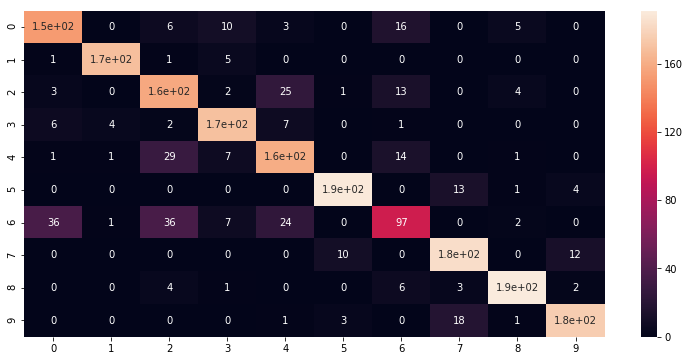

In [112]:
p=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [89]:
print(classification_report(y_test,y_pred_rfc))

             precision    recall  f1-score   support

          0       0.76      0.79      0.78       192
          1       0.97      0.96      0.96       176
          2       0.67      0.77      0.71       206
          3       0.84      0.89      0.87       190
          4       0.73      0.75      0.74       213
          5       0.93      0.91      0.92       208
          6       0.66      0.48      0.55       203
          7       0.84      0.89      0.87       206
          8       0.93      0.92      0.93       207
          9       0.91      0.88      0.90       199

avg / total       0.82      0.82      0.82      2000



## Random Forest (Entropy)

In [90]:
from sklearn.ensemble import RandomForestClassifier
rfc_2=RandomForestClassifier(criterion='entropy')
rfc_2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [91]:
y_pred_rfc2=rfc_2.predict(X_test)

In [92]:
score_9=accuracy_score(y_test,y_pred_rfc2)
print(score_9)

0.826


### Confusion Matrix

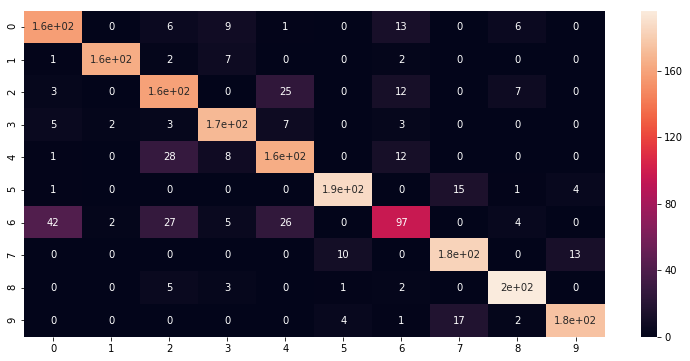

In [113]:
p=confusion_matrix(y_test,y_pred_rfc2)
plt.figure(figsize=(13,6))
sns.heatmap(p,annot=True)

### Classification Report

In [94]:
print(classification_report(y_test,y_pred_rfc2))

             precision    recall  f1-score   support

          0       0.75      0.82      0.78       192
          1       0.98      0.93      0.95       176
          2       0.69      0.77      0.73       206
          3       0.84      0.89      0.87       190
          4       0.74      0.77      0.75       213
          5       0.93      0.90      0.91       208
          6       0.68      0.48      0.56       203
          7       0.85      0.89      0.87       206
          8       0.91      0.95      0.93       207
          9       0.91      0.88      0.90       199

avg / total       0.83      0.83      0.82      2000



# We have implemented 9 Algorithms and now lets compare these and find which one was most Accurate

In [130]:
Accuracy = [score_1,score_2,score_3,score_4,score_5,score_6,score_7,score_8,score_9]
data1 = {
    'Accuracy':Accuracy,
    'Algorithm': ['Logistic Regression','KNN',"Naive Baye's",'SVM linear','SVM rbf',"Decision Tree(gini)",
                       'Decision Tree(entropy)','Random Forest Classifier(gini)','Random Forest Classifier(entropy)']}

df1 = pd.DataFrame(data1)

In [131]:
df1

,Accuracy,Algorithm
0,0.7465,Logistic Regression
1,0.8105,KNN
2,0.6650,Naive Baye's
3,0.7935,SVM linear
4,0.0880,SVM rbf
5,0.7360,Decision Tree(gini)
6,0.7470,Decision Tree(entropy)
7,0.8235,Random Forest Classifier(gini)
8,0.8260,Random Forest Classifier(entropy)


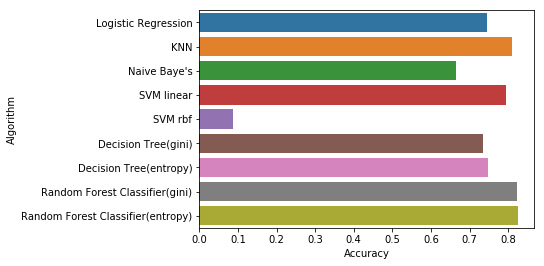

In [132]:
sns.barplot(x = df1.Accuracy, y = df1.Algorithm)

# Conclusion

#### As From the above graph we can see that Random Forest Classifier(Gini) And Random Forest Classifier(Entropy) both gives the best Accuracy among all the classifiers and among these two Random Forest(Entropy) is a slightly better algorithm than Gini for the given dataset.
